In [29]:
import os, yaml, sys
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from ultralytics import YOLO
from IPython.display import clear_output
%matplotlib inline

ENV = os.getenv("MY_ENV", "dev")
with open("../../config.yaml", "r") as f:
    config = yaml.safe_load(f)
paths = config[ENV]["paths"]
sys.path.append(paths["src_path"])
from image_processing.utils import read_video
from image_processing.computational_models import detect_faces, make_corners


In [30]:
from huggingface_hub import hf_hub_download
face_model_path = hf_hub_download(repo_id="arnabdhar/YOLOv8-Face-Detection", filename="model.pt")
face_model = YOLO(face_model_path)
person_model_path = 'yolov8n.pt'
person_model = YOLO(person_model_path)

In [31]:
from ultralytics import YOLO

# Load the model
model = YOLO("yolov8n.pt")  # or your custom weights

# Print class labels
print(model.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [32]:
video_dir = f"{paths['livingstone_lab']}/Stimuli/Movies/all_videos"
video_fn = os.listdir(video_dir)

In [33]:
people_vids = [fn for fn in video_fn if ("IMG" not in fn) and ("YDX" not in fn)]

In [34]:
monkey_vids = [fn for fn in video_fn if "IMG" in fn]

In [35]:
ydx_vids = [fn for fn in video_fn if "YDX" in fn]

In [51]:

fn = "YDXJ0090A.MP4"
v = read_video(paths, 1, fn, vid_duration=0)


19:04:45 - rank 1 YDXJ0090A.MP4 read successfully


In [ ]:
coords = detect_faces(v, face_model, person_model, 1.5)

In [52]:
from scipy.io import loadmat
coords = loadmat(f"{paths['livingstone_lab']}/tiziano/models/human_face_detection_{fn[:-4]}.mat")['coords']

KeyboardInterrupt: 

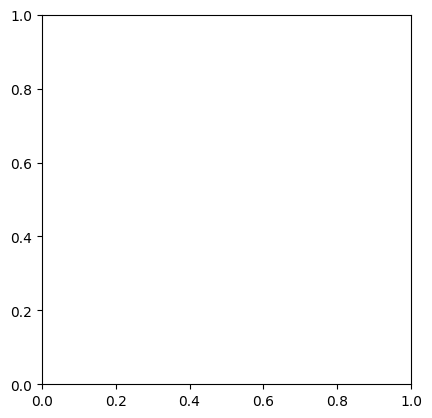

In [53]:
# print and check
for i in range(v.shape[0]):
    plt.imshow(v[i, :, :, :])
    if coords[1, i] is not None:
        points = make_corners(*coords[2:, i])
        plt.plot(points[:, 0], points[:, 1], 'r-', linewidth=2)
    if coords[0, i] == 0:
        label = "no face"
    elif coords[0, i] == 1:
        label = f"face {coords[1, i]}"
    elif coords[0, i] == 2:
        label = f"occluded {coords[1, i]}"
    plt.text(1, 0.8, label, fontsize=12,
            bbox=dict(facecolor="white", edgecolor="black", boxstyle="round,pad=0.3"))
    plt.show()
    clear_output(wait=True)